## Handling Outliers and It's Impact on ML

**Which Machine Learning Models Are Sensitive To Outliers?**

1.  **Naive Bayes Classifier**---------------------- Not Sensitive To Outliers
2.  **SVM**------------------------------------------------- Not Sensitive To Outliers
3.  **Linear Regression**------------------------------ Sensitive To Outliers
4.  **Logistic Regression**----------------------------Sensitive To Outliers
5.  **Decision Tree Regressor or Classifier**-- Not Sensitive
6.  **Ensemble(RF,XGboost,GB)**----------------- Not Sensitive
7.  **KNN**--------------------------------------- Not Sensitive
8.  **Kmeans**---------------------------------- Sensitive
9.  **Hierarichal**------------------------------ Sensitive
10. **PCA**--------------------------------------- Sensitive
11. **Neural Networks**---------------------- Sensitive

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Age'].isnull().sum()

177

### Normal Distribution Curve

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

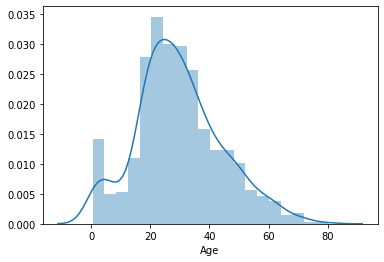

In [ ]:
sns.distplot(df['Age'].dropna())

### Adding Outliers

<AxesSubplot:xlabel='Age'>

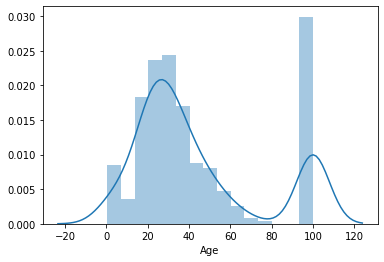

In [ ]:
sns.distplot(df['Age'].fillna(100))

### Without Dropping the Null Values (Gaussian Distribution)

Text(0, 0.5, 'Number of Passengers')

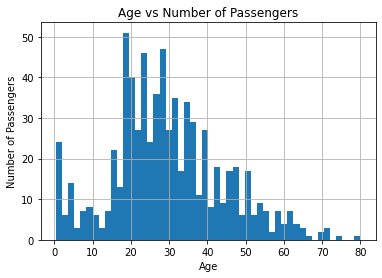

In [ ]:
figure = df.Age.hist(bins=50)
figure.set_title('Age vs Number of Passengers')
figure.set_xlabel('Age')
figure.set_ylabel('Number of Passengers')

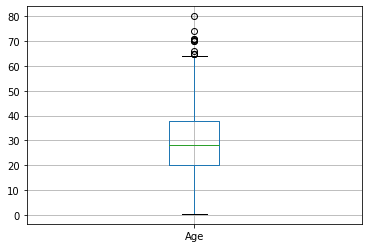

In [ ]:
figure = df.boxplot(column="Age")

* The Dotted Points are the Outliers

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 3-Standard Deviation Technique

**Assuming Age follows a Gaussian Distribution, we will calculate the boundaries which differentiate the outliers**

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
upper_boundary = df['Age'].mean() + 3*df['Age'].std()

In [ ]:
lower_boundary = df['Age'].mean() - 3*df['Age'].std()

In [ ]:
print(lower_boundary), print(upper_boundary), print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

* Anything above 73.28 can be considered as an outlier in this case.

### Computing the Inter-Quantile Range

* Inter-Quantile Range is used to calculate the boundaries

* Difference between 75%ile and 25%ile

In [ ]:
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [ ]:
IQR

17.875

In [ ]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)

In [ ]:
print(upper_bridge)

64.8125


In [ ]:
print(lower_bridge)

-6.6875


### Extreme Outliers

In [ ]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)

In [ ]:
print(upper_bridge), print(lower_bridge)

91.625
-33.5


(None, None)

### Skewed Column (Fare)

Text(0, 0.5, 'Number of Passengers')

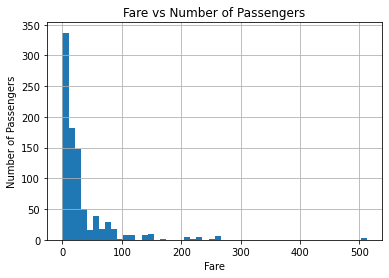

In [ ]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare vs Number of Passengers')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of Passengers')

* DataSet column 'Fare' is not distrubuted normally, it is skewed.

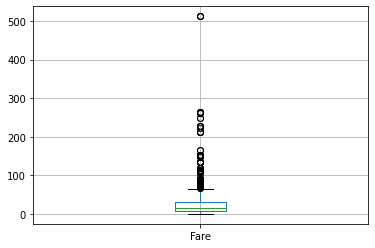

In [ ]:
figure = df.boxplot(column="Fare")

* Huge amount of outliers can be seen (dots)

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

* Difference between max and 75% is huge which says that there are many outliers

### Inter-Quantile Range (Fare Column)

* In terms of skewed data, it is quite possible that the IQR method won't work but you have to try it.

* For normal Distribution, IQR will definitely work.

In [ ]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [ ]:
print(IQR)

23.0896


In [ ]:
upper_boundary = df['Fare'].mean() + 3*df['Fare'].std()
lower_boundary = df['Fare'].mean() - 3*df['Fare'].std()
print(lower_boundary), print(upper_boundary), print(df['Fare'].mean())

-116.87607782296804
181.2844937601173
32.204207968574636


(None, None, None)

**Have to use the upper and lower boundary values for the outliers in the Age Column or Normal Distribution**

In [ ]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(upper_bridge), print(lower_bridge)

65.6344
-26.724


(None, None)

### Extreme Outliers

In [ ]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(upper_bridge), print(lower_bridge)

100.2688
-61.358399999999996


(None, None)

* Since the fare columns consists of data like 200, 300 and 500, we take extreme outliers as the boundary.

* Anything above 100.2688 is considered as an outlier in this case (**Skewed Data**)

In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Age']>73, 'Age'] = 73

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.loc[data['Fare']>100, 'Fare'] = 100

In [ ]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0, 0.5, 'Number of Passengers')

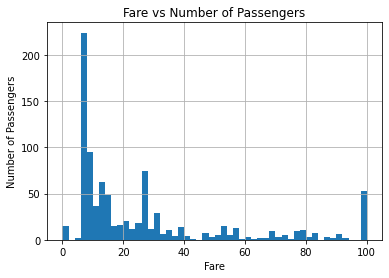

In [ ]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare vs Number of Passengers')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

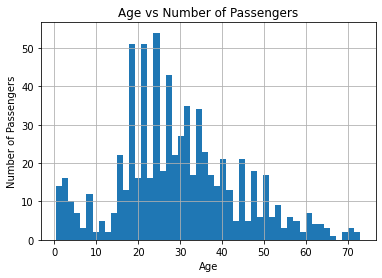

In [ ]:
figure = data.Age.hist(bins=50)
figure.set_title('Age vs Number of Passengers')
figure.set_xlabel('Age')
figure.set_ylabel('Number of Passengers')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'],
                                                    test_size=0.3)

### Logistic Regression (Sensitive to Outliers)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("ROC_AUC Score: {}".format(roc_auc_score(y_test, y_pred1[:, 1])))

Accuracy Score: 0.6791044776119403
ROC_AUC Score: 0.6787952540310314


### Random Forest Classifier (Not Sensitive to Outliers)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("ROC_AUC Score: {}".format(roc_auc_score(y_test, y_pred1[:, 1])))

Accuracy Score: 0.667910447761194
ROC_AUC Score: 0.7053544265287497
